# Sentiment & Thematic Analysis

In [1]:
# Embed project directory to sys.path
import os, sys
from pathlib import Path

parent_directory = Path(os.getcwd()).parent
sys.path.insert(0, str(parent_directory))
sys.path

['/home/miki/Desktop/KIFIYA/week-2/customer-experience-analytics',
 '/usr/lib/python312.zip',
 '/usr/lib/python3.12',
 '/usr/lib/python3.12/lib-dynload',
 '',
 '/home/miki/Desktop/KIFIYA/week-2/customer-experience-analytics/venv/lib/python3.12/site-packages']

In [2]:
# Load combined reviews data
from scripts.load_csv import load_reviews

df = load_reviews(filepath=f"{parent_directory}/data/all_reviews.csv")
df.head()

2025-06-08 12:25:28,838 - INFO - Successfully loaded data from /home/miki/Desktop/KIFIYA/week-2/customer-experience-analytics/data/all_reviews.csv with shape (1200, 8)


,Unnamed: 0,reviewId,userName,review,rating,date,bank,source
0,0,b12d0383-9b27-4e49-a94d-277a43b15800,Yesuf Ahmed,the app is proactive and a good connections.,5,2025-06-05 15:55:10,CBE,Google Play Store
1,1,dd9f9e37-177a-46df-b877-d0edaa9aed29,Yonas Mekonnen,I cannot send to cbebirr app. through this app.,3,2025-06-05 11:12:49,CBE,Google Play Store
2,2,8e34703c-203c-4180-8b32-bfd0b3f0c871,Yibrah Yebo,good,4,2025-06-05 10:21:59,CBE,Google Play Store
3,3,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,kibru tebeka,not functional,1,2025-06-05 07:38:12,CBE,Google Play Store
4,4,f0dd744a-9409-4619-9800-7ea501571b09,Abreham Shiferaw,everytime you uninstall the app you have to re...,1,2025-06-04 21:33:36,CBE,Google Play Store


In [3]:
import importlib
from scripts import text_preprocessor
importlib.reload(text_preprocessor)

<module 'scripts.text_preprocessor' from '/home/miki/Desktop/KIFIYA/week-2/customer-experience-analytics/scripts/text_preprocessor.py'>

In [4]:
from scripts.text_preprocessor import ReviewPreprocessor

pre_processor = ReviewPreprocessor()
df["cleaned_review"] = df["review"].apply(pre_processor.clean_text)
df.head()

,Unnamed: 0,reviewId,userName,review,rating,date,bank,source,cleaned_review
0,0,b12d0383-9b27-4e49-a94d-277a43b15800,Yesuf Ahmed,the app is proactive and a good connections.,5,2025-06-05 15:55:10,CBE,Google Play Store,the app is proactive and a good connections
1,1,dd9f9e37-177a-46df-b877-d0edaa9aed29,Yonas Mekonnen,I cannot send to cbebirr app. through this app.,3,2025-06-05 11:12:49,CBE,Google Play Store,i cannot send to cbebirr app through this app
2,2,8e34703c-203c-4180-8b32-bfd0b3f0c871,Yibrah Yebo,good,4,2025-06-05 10:21:59,CBE,Google Play Store,good
3,3,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,kibru tebeka,not functional,1,2025-06-05 07:38:12,CBE,Google Play Store,not functional
4,4,f0dd744a-9409-4619-9800-7ea501571b09,Abreham Shiferaw,everytime you uninstall the app you have to re...,1,2025-06-04 21:33:36,CBE,Google Play Store,everytime you uninstall the app you have to re...


In [5]:
df["tokens"] = df["cleaned_review"].apply(pre_processor.tokenize_text)
df.head()

,Unnamed: 0,reviewId,userName,review,rating,date,bank,source,cleaned_review,tokens
0,0,b12d0383-9b27-4e49-a94d-277a43b15800,Yesuf Ahmed,the app is proactive and a good connections.,5,2025-06-05 15:55:10,CBE,Google Play Store,the app is proactive and a good connections,"[app, proactive, good, connection]"
1,1,dd9f9e37-177a-46df-b877-d0edaa9aed29,Yonas Mekonnen,I cannot send to cbebirr app. through this app.,3,2025-06-05 11:12:49,CBE,Google Play Store,i cannot send to cbebirr app through this app,"[send, cbebirr, app, app]"
2,2,8e34703c-203c-4180-8b32-bfd0b3f0c871,Yibrah Yebo,good,4,2025-06-05 10:21:59,CBE,Google Play Store,good,[good]
3,3,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,kibru tebeka,not functional,1,2025-06-05 07:38:12,CBE,Google Play Store,not functional,[functional]
4,4,f0dd744a-9409-4619-9800-7ea501571b09,Abreham Shiferaw,everytime you uninstall the app you have to re...,1,2025-06-04 21:33:36,CBE,Google Play Store,everytime you uninstall the app you have to re...,"[everytime, uninstall, app, reach, physically,..."


In [6]:
# Save preprocessed data
df.to_csv(f"{parent_directory}/data/pre_processed.csv")

In [7]:
# Use SentimentAnalyzer to perform sentiment analysis
from scripts.sentiment_analysis import SentimentAnalyzer

sentiment_analyzer = SentimentAnalyzer()
df["sentiment_label"], df["sentiment_score"] = zip(*df["cleaned_review"].apply(sentiment_analyzer.predict))
df.head()

,Unnamed: 0,reviewId,userName,review,rating,date,bank,source,cleaned_review,tokens,sentiment_label,sentiment_score
0,0,b12d0383-9b27-4e49-a94d-277a43b15800,Yesuf Ahmed,the app is proactive and a good connections.,5,2025-06-05 15:55:10,CBE,Google Play Store,the app is proactive and a good connections,"[app, proactive, good, connection]",positive,0.6908
1,1,dd9f9e37-177a-46df-b877-d0edaa9aed29,Yonas Mekonnen,I cannot send to cbebirr app. through this app.,3,2025-06-05 11:12:49,CBE,Google Play Store,i cannot send to cbebirr app through this app,"[send, cbebirr, app, app]",neutral,0.0000
2,2,8e34703c-203c-4180-8b32-bfd0b3f0c871,Yibrah Yebo,good,4,2025-06-05 10:21:59,CBE,Google Play Store,good,[good],positive,0.4404
3,3,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,kibru tebeka,not functional,1,2025-06-05 07:38:12,CBE,Google Play Store,not functional,[functional],neutral,0.0000
4,4,f0dd744a-9409-4619-9800-7ea501571b09,Abreham Shiferaw,everytime you uninstall the app you have to re...,1,2025-06-04 21:33:36,CBE,Google Play Store,everytime you uninstall the app you have to re...,"[everytime, uninstall, app, reach, physically,...",neutral,0.0258


In [8]:
# Save output to a csv file
df[["reviewId", "date","bank", "rating", "cleaned_review", "sentiment_label", "sentiment_score"]].to_csv(f"{parent_directory}/data/sentiment_output.csv", index=False)

In [9]:
# Group by bank name and rating and calculate mean sentiment score
summary_df = df.groupby(["bank", "rating"])["sentiment_score"].mean().reset_index()
summary_df.rename(columns={"sentiment_score": "mean_sentiment_score"}, inplace=True)
summary_df.sort_values(["bank", "rating"], inplace=True)
summary_df.head()

,bank,rating,mean_sentiment_score
0,BOA,1,-0.142691
1,BOA,2,0.183736
2,BOA,3,0.190100
3,BOA,4,0.333017
4,BOA,5,0.346075


In [10]:
# Save summary df to a csv file
summary_df.to_csv(f"{parent_directory}/data/sentiment_summary_by_bank_and_rating.csv", index=False)

2025-06-08 12:25:37,908 - INFO - Plot generator initialized successfully.
2025-06-08 12:25:37,940 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-08 12:25:37,949 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


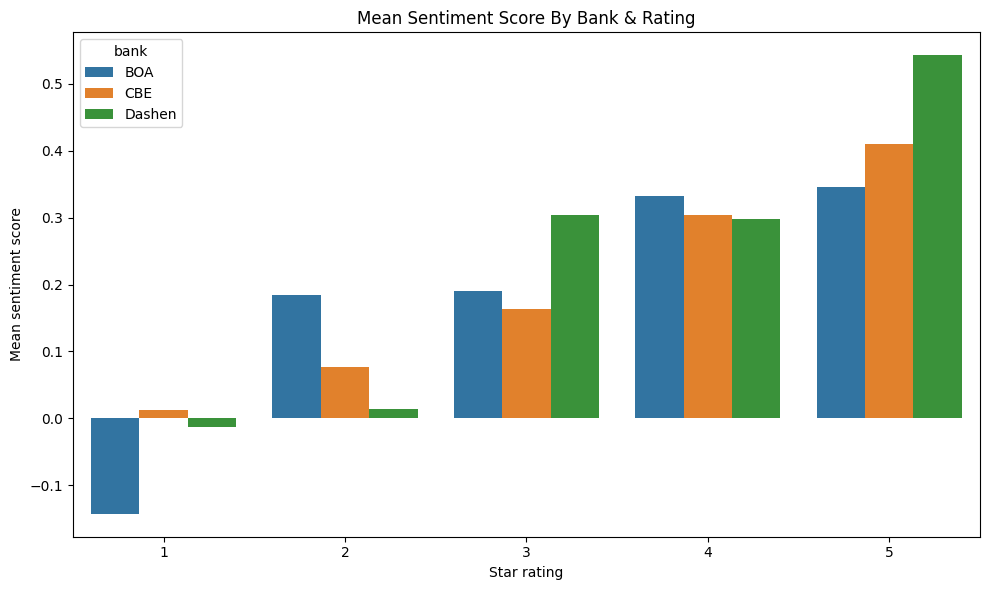

2025-06-08 12:25:38,382 - INFO - [✓] Bar chart saved to: /home/miki/Desktop/KIFIYA/week-2/customer-experience-analytics/notebooks/plots/mean_sentiment_score_by_bank_and_rating.png


In [11]:
# Visulaize the summary dataframe using bar chart
from scripts.plot_generator import PlotGenerator
import pandas as pd

df['rating'] = df['rating'].astype(int)
df['date'] = pd.to_datetime(df['date'])


plot_generator = PlotGenerator(df=summary_df)
plot_generator.plot_barchart(x_value="rating", y_value="mean_sentiment_score",
                             x_label="Star rating", y_label="Mean sentiment score",
                             title="Mean Sentiment Score By Bank & Rating",
                             hue="bank", legend=True,
                             file_path=f"{parent_directory}/notebooks/plots/mean_sentiment_score_by_bank_and_rating.png")

In [12]:
# Extract keywords from cleaned review
from scripts.extract_keywords import extract_keywords

df = extract_keywords(df=df, text_column="cleaned_review", top_n=50)
df.head()

,Unnamed: 0,reviewId,userName,review,rating,date,bank,source,cleaned_review,tokens,sentiment_label,sentiment_score,keywords
0,0,b12d0383-9b27-4e49-a94d-277a43b15800,Yesuf Ahmed,the app is proactive and a good connections.,5,2025-06-05 15:55:10,CBE,Google Play Store,the app is proactive and a good connections,"[app, proactive, good, connection]",positive,0.6908,"[the app, app is, good, and, is, the, app]"
1,1,dd9f9e37-177a-46df-b877-d0edaa9aed29,Yonas Mekonnen,I cannot send to cbebirr app. through this app.,3,2025-06-05 11:12:49,CBE,Google Play Store,i cannot send to cbebirr app through this app,"[send, cbebirr, app, app]",neutral,0.0000,"[cannot, through, send, app, this app, this, to]"
2,2,8e34703c-203c-4180-8b32-bfd0b3f0c871,Yibrah Yebo,good,4,2025-06-05 10:21:59,CBE,Google Play Store,good,[good],positive,0.4404,[good]
3,3,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,kibru tebeka,not functional,1,2025-06-05 07:38:12,CBE,Google Play Store,not functional,[functional],neutral,0.0000,"[functional, not]"
4,4,f0dd744a-9409-4619-9800-7ea501571b09,Abreham Shiferaw,everytime you uninstall the app you have to re...,1,2025-06-04 21:33:36,CBE,Google Play Store,everytime you uninstall the app you have to re...,"[everytime, uninstall, app, reach, physically,...",neutral,0.0258,"[app, you, very, for, we are, everytime, them,..."


In [13]:
# Save the keywords to a file
df[["reviewId", "cleaned_review", "keywords"]].to_csv(f"{parent_directory}/data/review_keywords.csv")

In [14]:
# Map keywords to manually defined themes
keyword_theme_map = {
    "login": "Account Access Issues",
    "password": "Account Access Issues",
    "fail": "Account Access Issues",
    "transfer": "Transaction Performance",
    "delay": "Transaction Performance",
    "slow": "Transaction Performance",
    "support": "Customer Support",
    "help": "Customer Support",
    "customer care": "Customer Support",
    "design": "User Experience",
    "interface": "User Experience",
    "easy": "User Experience",
}

from scripts.map_keywords_with_themes import map_keywords_to_themes
df['themes'] = df['keywords'].apply(lambda kws: map_keywords_to_themes(kws, keyword_theme_map))
df.head()

,Unnamed: 0,reviewId,userName,review,rating,date,bank,source,cleaned_review,tokens,sentiment_label,sentiment_score,keywords,themes
0,0,b12d0383-9b27-4e49-a94d-277a43b15800,Yesuf Ahmed,the app is proactive and a good connections.,5,2025-06-05 15:55:10,CBE,Google Play Store,the app is proactive and a good connections,"[app, proactive, good, connection]",positive,0.6908,"[the app, app is, good, and, is, the, app]",[Other]
1,1,dd9f9e37-177a-46df-b877-d0edaa9aed29,Yonas Mekonnen,I cannot send to cbebirr app. through this app.,3,2025-06-05 11:12:49,CBE,Google Play Store,i cannot send to cbebirr app through this app,"[send, cbebirr, app, app]",neutral,0.0000,"[cannot, through, send, app, this app, this, to]",[Other]
2,2,8e34703c-203c-4180-8b32-bfd0b3f0c871,Yibrah Yebo,good,4,2025-06-05 10:21:59,CBE,Google Play Store,good,[good],positive,0.4404,[good],[Other]
3,3,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,kibru tebeka,not functional,1,2025-06-05 07:38:12,CBE,Google Play Store,not functional,[functional],neutral,0.0000,"[functional, not]",[Other]
4,4,f0dd744a-9409-4619-9800-7ea501571b09,Abreham Shiferaw,everytime you uninstall the app you have to re...,1,2025-06-04 21:33:36,CBE,Google Play Store,everytime you uninstall the app you have to re...,"[everytime, uninstall, app, reach, physically,...",neutral,0.0258,"[app, you, very, for, we are, everytime, them,...",[Other]
